# Studying weather patern with python 

The data is downloaded from waetherunderground using html parsing and analyzed/displayed with Pandas.

In [2]:
# imports
%matplotlib inline
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import FileLink, FileLinks

In [3]:
URLS = [f"https://api-ak.wunderground.com/history/airport/LFST/2010/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)]
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2011/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2012/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2013/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2014/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2015/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2016/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2017/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2018/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2019/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])

full_head = ['day', 
             'Thigh', 'Tmid', 'Tlow',
             'Dewhigh', 'Dewmid', 'Dewlow',
             'Humidhigh', 'Humidmid', 'Humidlow',
             'Phigh', 'Pmid', 'Plow',
             'Vishigh', 'Vismid', 'Vislow',
             'Windhigh', 'Windmid', 'Windlow',
             'Rain',]


def tofloat(x):
  v=float(0)
  try:
    v=float(x)
  except:
    v=np.nan
  return v


In [4]:
dataset = []

for mois, url in enumerate(URLS):
  print(f"# Fetching {url} ({mois})")
  contents = urllib.request.urlopen(url).read()
  soup = BeautifulSoup(contents)
  table = soup.find("table", attrs={"id":"obsTable"})

  for row in table.find_all("tr")[2:]:
    data = dict(zip(full_head, ( tofloat(td.get_text().strip()) for td in row.find_all("td")[:-1])))
    data['day']=data.get('day', 0)+mois
    dataset.append(data)

# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/1/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (0)
# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/2/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (1)
# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/3/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (2)
# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/4/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (3)
# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/5/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (4)
# Fetching http

In [4]:
df = pd.DataFrame(dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 20 columns):
Dewhigh      3622 non-null float64
Dewlow       3622 non-null float64
Dewmid       3622 non-null float64
Humidhigh    3622 non-null float64
Humidlow     3622 non-null float64
Humidmid     3622 non-null float64
Phigh        3622 non-null float64
Plow         3622 non-null float64
Pmid         3622 non-null float64
Rain         3623 non-null float64
Thigh        3622 non-null float64
Tlow         3622 non-null float64
Tmid         3621 non-null float64
Vishigh      3619 non-null float64
Vislow       3619 non-null float64
Vismid       3619 non-null float64
Windhigh     3622 non-null float64
Windlow      514 non-null float64
Windmid      3622 non-null float64
day          3656 non-null float64
dtypes: float64(20)
memory usage: 571.6 KB


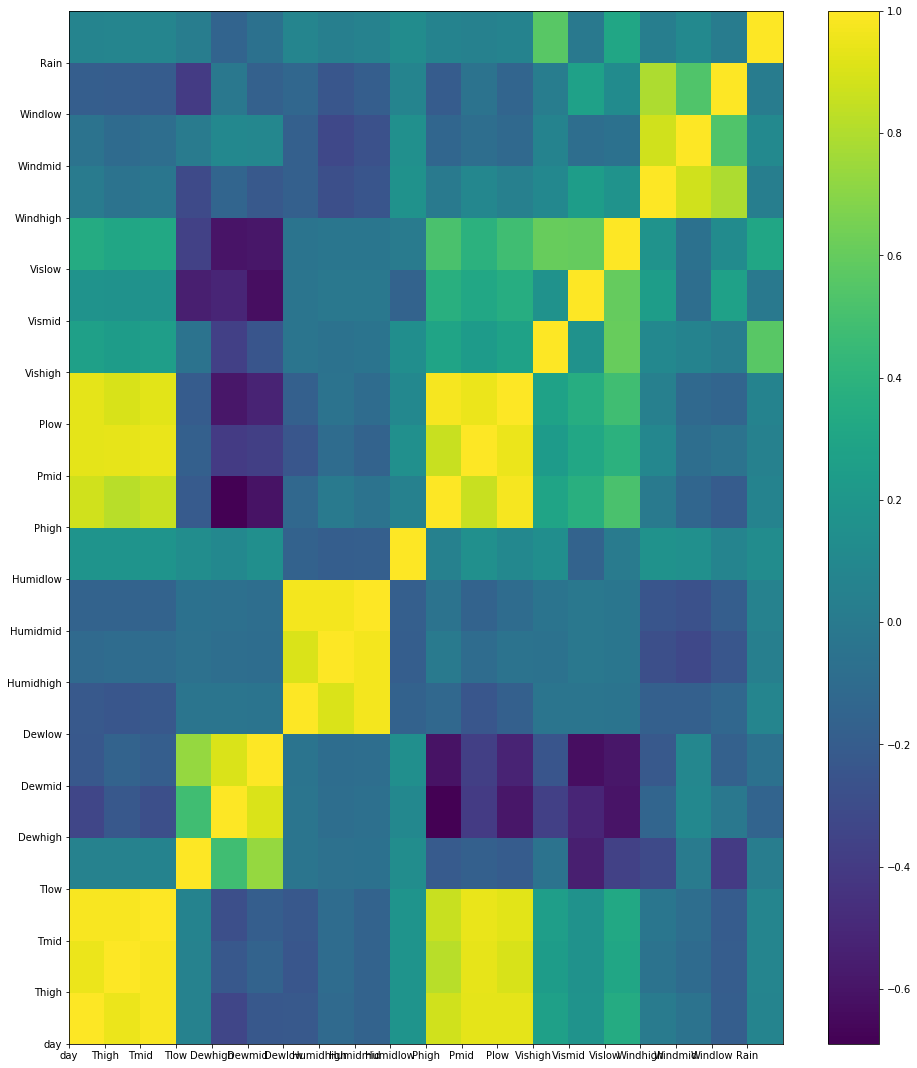

In [5]:
plt.figure(figsize=(16,19))
plt.pcolormesh(df.corr())
plt.xticks(list(range(len(full_head))), full_head)
plt.yticks(list(range(len(full_head))), full_head)
plt.colorbar()
plt.show()

In [6]:
df[['Thigh', 'Windhigh', 'Rain']].corr()

,Thigh,Windhigh,Rain
Thigh,1.000000,-0.002664,0.046317
Windhigh,-0.002664,1.000000,0.167243
Rain,0.046317,0.167243,1.000000


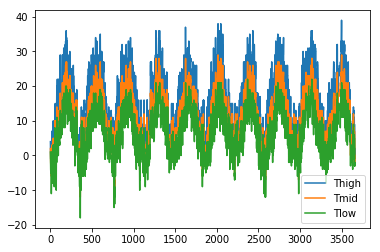

In [7]:
df[['Thigh', 'Tmid', 'Tlow']].plot()

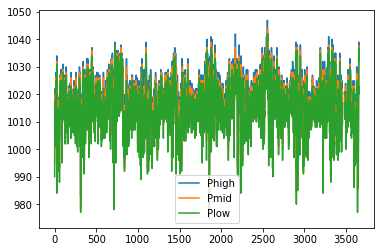

In [8]:
df[['Phigh', 'Pmid', 'Plow']].plot()

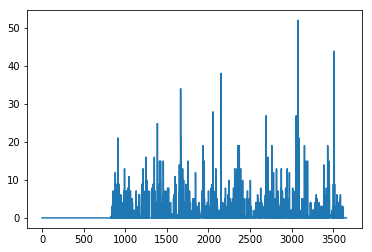

In [9]:
df['Rain'].plot()

In [10]:
df.to_csv('2010_2019.csv')

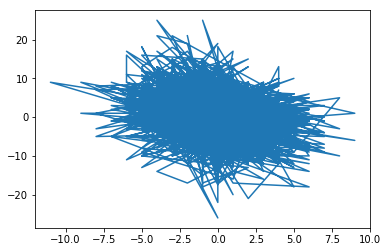

In [11]:
dT = [ df.iloc[i+1]['Tmid'] - df.iloc[i]['Tmid'] for i in range(len(df)-1) ]
dP = [ df.iloc[i+1]['Pmid'] - df.iloc[i]['Pmid'] for i in range(len(df)-1) ]

plt.plot(dT, dP)


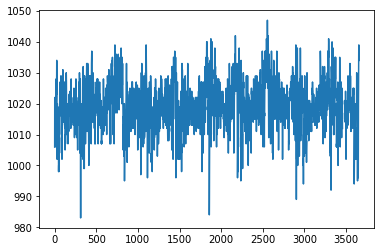

In [12]:
df['Phigh'].plot()

3658

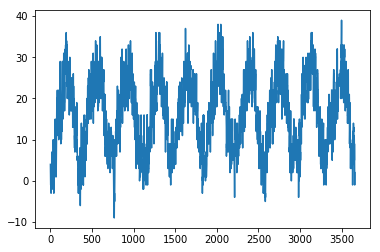

In [13]:
df['Thigh'].plot()

len(df)

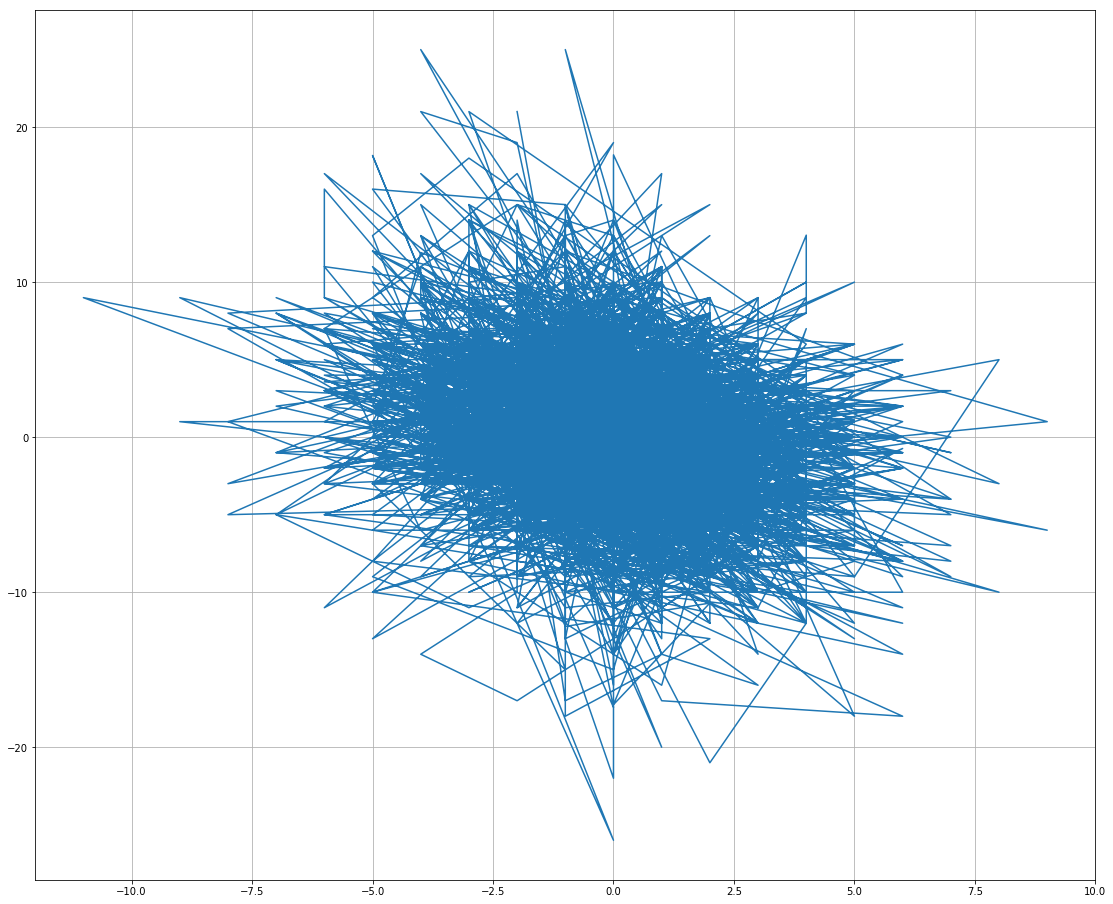

In [14]:
dT = [ df.iloc[i+1]['Tmid'] - df.iloc[i]['Tmid'] for i in range(len(df)-1) ]
dP = [ df.iloc[i+1]['Pmid'] - df.iloc[i]['Pmid'] for i in range(len(df)-1) ]

plt.figure(figsize=(19, 16))
plt.grid(True)
plt.plot(dT, dP)
plt.show()

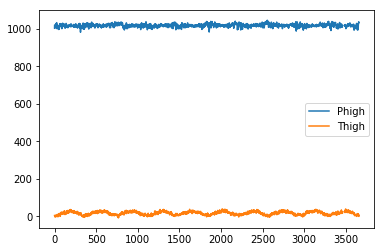

In [15]:
df[['Phigh', 'Thigh']].plot()

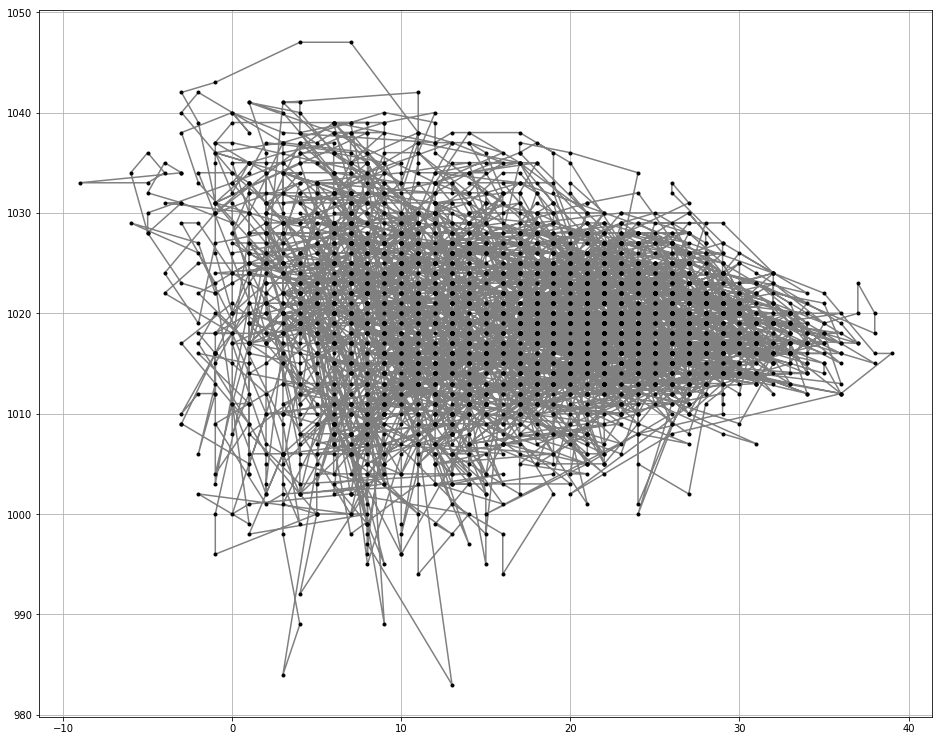

In [16]:
plt.figure(figsize=(16, 13))
plt.grid(True)

plt.plot(df.Thigh, df.Phigh, '-',color='grey')
plt.plot(df.Thigh, df.Phigh, '.k')
plt.show()